In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

from netCDF4 import Dataset

%matplotlib inline

In [2]:
lonc = 180.0
shp_Bname = 'out_shape/mycoast'
shp_Cname = 'out_shape/mycoast.shp'

/home/ollie/psong/miniconda3/envs/psong_wind/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ollie/psong/miniconda3/envs/psong_wind/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


{0.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c6a450>],
  [Text(0.36, -93.6, '0°')]),
 30.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c6a210>],
  [Text(30.24, -93.6, '30°E')]),
 60.0: ([<matplotlib.lines.Line2D at 0x7fb1f2d9ff10>],
  [Text(60.12, -93.6, '60°E')]),
 90.0: ([<matplotlib.lines.Line2D at 0x7fb1f09afcd0>],
  [Text(90.36, -93.6, '90°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c6a950>],
  [Text(120.24, -93.6, '120°E')]),
 150.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c76250>],
  [Text(150.12, -93.6, '150°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c6ad90>],
  [Text(180.35999999999999, -93.6, '180°')]),
 210.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c76710>],
  [Text(210.23999999999998, -93.6, '150°W')]),
 240.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c820d0>],
  [Text(240.12, -93.6, '120°W')]),
 270.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c82590>],
  [Text(270.36, -93.6, '90°W')]),
 300.0: ([<matplotlib.lines.Line2D at 0x7fb1f2c76bd0>],
  [Text(300.24, -93.6, '60°W

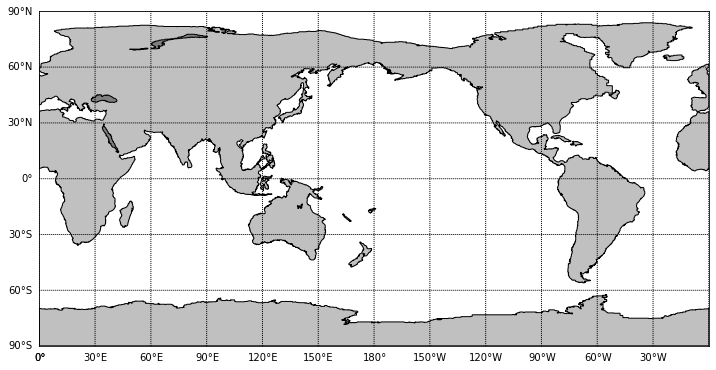

In [3]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

m = Basemap(projection='cyl',lon_0=lonc,ax=ax)
m.readshapefile(shp_Bname, 'mycoast', drawbounds = False)

patches_land = []
patches_lake = []

for info, shape in zip(m.mycoast_info, m.mycoast):
    if info['Polygon'] in ['Land','Antarctica']:
        patches_land.append(Polygon(np.array(shape),True))
    elif info['Polygon'] == 'Lake':
        patches_lake.append(Polygon(np.array(shape),True))
        
ax.add_collection(PatchCollection(patches_land, facecolor='silver', edgecolor='k', linewidths=1.0))
ax.add_collection(PatchCollection(patches_lake, facecolor='gray', edgecolor='k', linewidths=1.0))

m.drawparallels(np.arange(-90.,91.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,361.,30.),labels=[0,0,0,1])


## Not working well with Cartopy and I don't know why

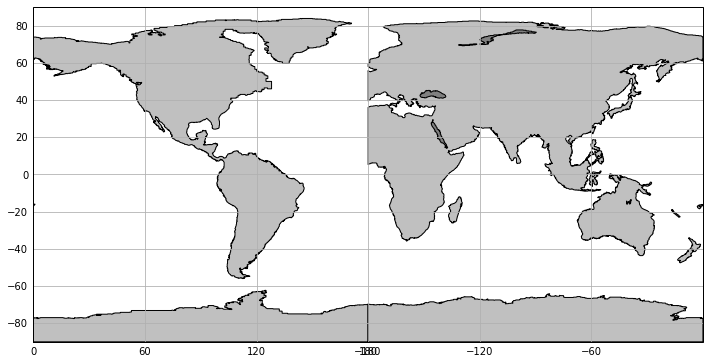

In [4]:
map_proj = ccrs.PlateCarree(central_longitude=lonc)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection=map_proj)

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False

geoms_land=[]
geoms_lake=[]

mycoast = shpreader.Reader(shp_Cname)
for info, geom in zip(mycoast.records(), mycoast.geometries()):
    if info.attributes['Polygon'] in ['Land','Antarctica']:
        geoms_land.append(geom)
    elif info.attributes['Polygon'] == 'Lake':
        geoms_lake.append(geom)
        
ax.add_geometries(geoms_land, crs=map_proj, facecolor='silver', edgecolor='k', linewidths=1.0)
ax.add_geometries(geoms_lake, crs=map_proj, facecolor='gray', edgecolor='k', linewidths=1.0)

ax.set_global()
